# 1.2 Assignment: R Refresher
The first assignment is a review of R. This purpose of this assignment is to provide a refresher of R and python. The assignment is divided into three sections.


## 1. Import, Plot, Summarize, and Save Data

Using the Bureau of Labor Statistics data, choose a dataset that interest you. Then generate summary statistics for 2 variables, plot some of the features (e.g., histograms, box plots, density plots, etc.) of several variables, and save the data locally as CSV files.

### Importing and restructuring data

In [1]:
# Importing the required libraries
library(readxl)
library(tidyr)
library(ggplot2)
library(corrplot)
library(dplyr)
library(forecast)
library(GGally)
options(warn=-1)

Warning message:
"package 'tidyr' was built under R version 3.6.3"Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'corrplot' was built under R version 3.6.3"corrplot 0.84 loaded
Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'forecast' was built under R version 3.6.3"Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


In [2]:
# Creating a vector to iterate over to import my data sets
commodities <- c("Bacon", "Bananas", "Bread", "Chicken", "Coffee", "Eggs", "Electricity", 
                "Flour", "Fuel_Oil", "Gasoline", "Milk", "Rice", "Tomatoes")

In [3]:
# Checking the structure of the data
df <- read_xlsx("average_price_data/Coffee.xlsx", skip = 8)
head(df)

Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1980,3.208,3.258,3.248,3.209,3.200,3.181,3.233,3.230,3.159,3.053,2.913,2.818
1981,2.777,2.595,2.557,2.562,2.538,2.517,2.512,2.492,2.460,2.451,2.408,2.457
1982,2.475,2.552,2.564,2.585,2.567,2.527,2.502,2.515,2.517,2.500,2.481,2.501
1983,2.528,2.519,2.478,2.466,2.459,2.470,2.454,2.451,2.438,2.432,2.454,2.437
1984,2.495,2.546,2.546,2.549,2.567,2.598,2.609,2.606,2.617,2.616,2.594,2.593
1985,2.585,2.594,2.621,2.603,2.606,2.614,2.590,2.564,2.563,2.573,2.549,2.505


In [4]:
df <- pivot_longer(df, cols=2:13, names_to = "Month", values_to="Coffee")
df$date <- as.Date(paste(df$Month, df$Year, 15,  sep=" "), format="%b %Y %d")
df <- subset(df, select=-c(Year, Month))
df <- df[,rev(colnames(df))]
head(df)

date,Coffee
1980-01-15,3.208
1980-02-15,3.258
1980-03-15,3.248
1980-04-15,3.209
1980-05-15,3.200
1980-06-15,3.181


In [5]:
main <- data.frame()

# Iterate over all the commodities and add the data to a dataframe
for(i in commodities){
    df <- read_xlsx(paste("average_price_data/",i, ".xlsx", sep=""), skip = 8)
    df <- pivot_longer(df, cols=2:13, names_to = "Month", values_to = i)
    df$date <- as.Date(paste(df$Month, df$Year, 15,  sep=" "), format="%b %Y %d")

    df <- subset(df, select=-c(Year, Month))
    df <- df[,rev(colnames(df))]
    if (dim(main)[2] == 0) {
        main <- df
}
    else{main <- merge(main,df, all = TRUE)
    }
}

In [6]:
sample_n(main, 10)

date,Bacon,Bananas,Bread,Chicken,Coffee,Eggs,Electricity,Flour,Fuel_Oil,Gasoline,Milk,Rice,Tomatoes
2003-11-15,3.228,0.498,0.953,1.068,2.779,1.448,0.090,0.285,1.331,1.578,2.937,0.490,1.480
2004-05-15,3.330,0.491,0.960,1.039,2.831,1.372,0.093,0.297,1.533,2.050,3.374,0.528,1.510
1981-10-15,1.780,0.364,0.521,0.712,2.451,0.898,0.072,0.226,1.232,1.353,NA,0.556,0.652
2017-08-15,6.241,0.561,1.348,1.489,4.373,1.367,0.142,0.512,2.292,2.436,3.168,0.753,1.846
2020-02-15,5.497,0.574,1.375,1.362,4.250,1.449,0.134,0.438,2.812,2.530,3.196,0.734,2.197
2009-10-15,3.603,0.598,1.392,1.244,NA,1.595,0.126,0.500,2.603,2.613,3.046,0.751,1.595
1991-04-15,2.271,0.547,0.701,0.885,2.924,1.002,0.084,0.237,1.016,1.159,NA,0.502,1.210
1982-08-15,2.200,0.332,0.534,0.717,2.515,0.778,0.079,0.227,1.195,1.310,NA,0.494,0.584
2020-10-15,5.722,0.577,1.503,1.580,4.522,1.408,0.135,0.452,2.139,2.228,3.380,0.766,1.911
1983-03-15,2.072,0.357,0.544,0.698,2.478,0.836,0.076,0.211,1.101,1.135,NA,0.468,1.081


### Plotting time series

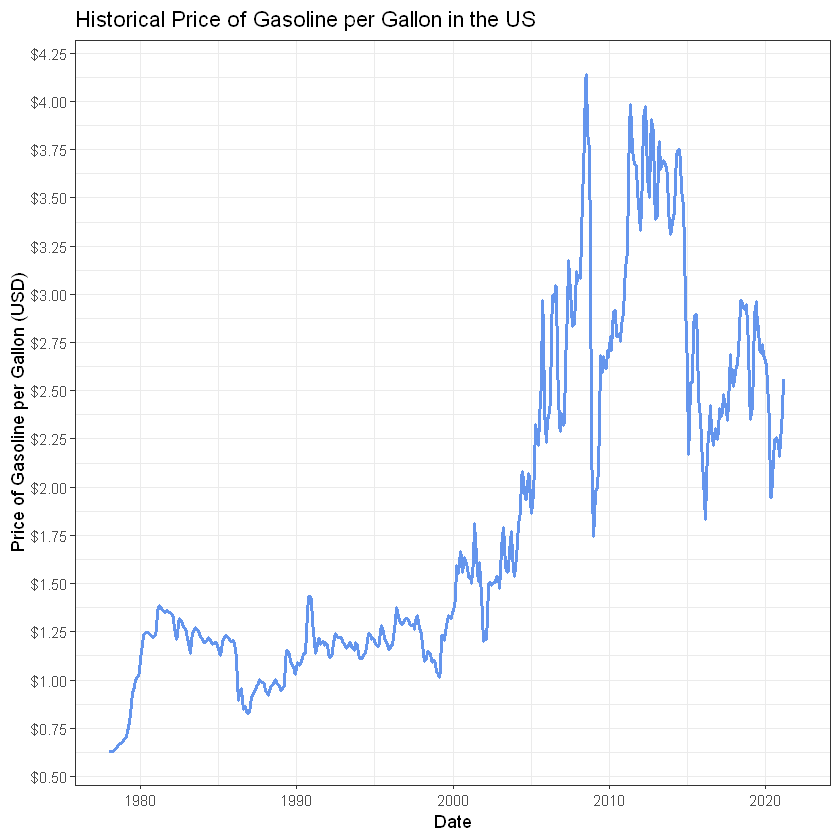

In [7]:
ggplot() + 
geom_line(data = main, aes(x= date, y = Gasoline), size = 1, color = "cornflowerblue") + 
xlab("Date") +
ylab("Price of Gasoline per Gallon (USD)") +
ggtitle("Historical Price of Gasoline per Gallon in the US") + 
scale_y_continuous(breaks = seq(from = 0, to = 5, by = 0.25), 
                   labels=scales::dollar_format(scale = 1.00)) + 
theme_bw()


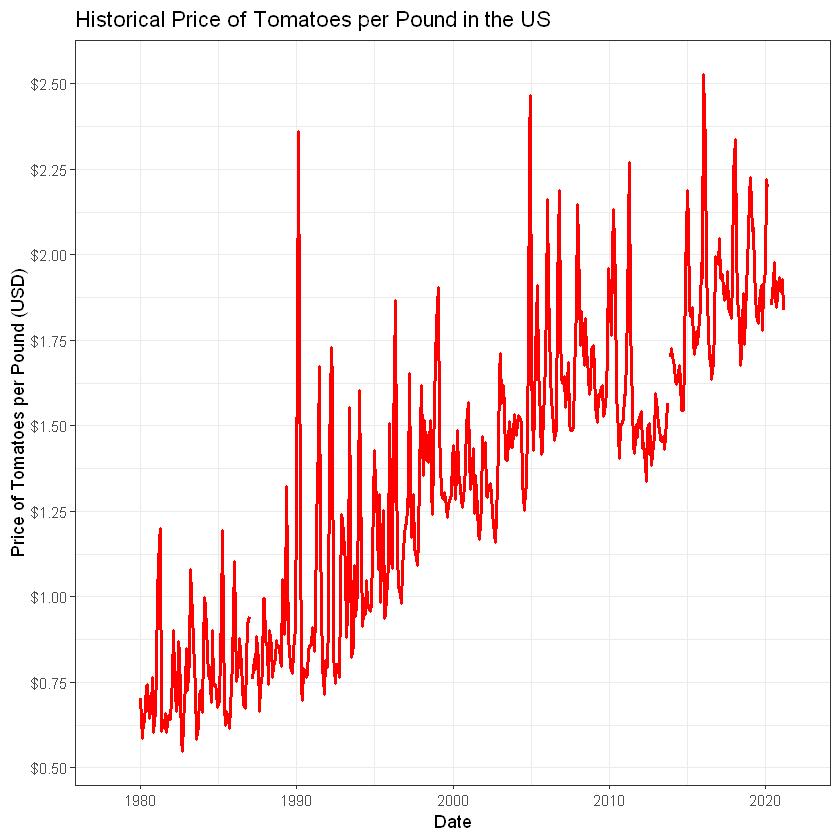

In [8]:
ggplot() + 
geom_line(data = main, aes(x= date, y = Tomatoes), size = 1, color = "red") + 
xlab("Date") +
ylab("Price of Tomatoes per Pound (USD)") +
ggtitle("Historical Price of Tomatoes per Pound in the US") + 
scale_y_continuous(breaks = seq(from = 0, to = 3, by = 0.25), 
                   labels=scales::dollar_format(scale = 1.00)) + 
theme_bw()


### Plotting histogram

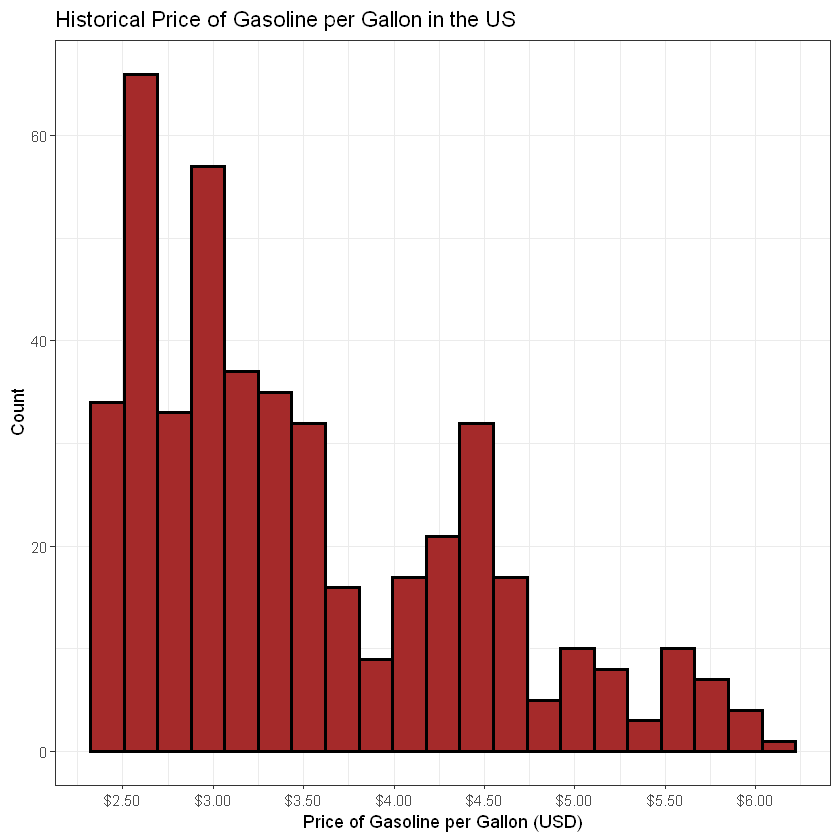

In [9]:
ggplot() + 
geom_histogram(data = main, aes(x=Coffee), size = 1, color = "black", fill = "brown", bins = 21) + 
ylab("Count") +
xlab("Price of Gasoline per Gallon (USD)") +
ggtitle("Historical Price of Gasoline per Gallon in the US") + 
scale_x_continuous(breaks = seq(from = 0, to = 7, by = 0.5), 
                   labels=scales::dollar_format(scale = 1.00)) + 
theme_bw()

### Summarize

In [10]:
# Generating summary statistics for all of the items
summary(main[2:13])

     Bacon          Bananas          Bread           Chicken     
 Min.   :1.266   Min.   :0.315   Min.   :0.5010   Min.   :0.628  
 1st Qu.:1.980   1st Qu.:0.432   1st Qu.:0.6873   1st Qu.:0.883  
 Median :3.041   Median :0.502   Median :0.9255   Median :1.043  
 Mean   :3.247   Mean   :0.494   Mean   :0.9722   Mean   :1.082  
 3rd Qu.:4.346   3rd Qu.:0.573   3rd Qu.:1.3388   3rd Qu.:1.292  
 Max.   :6.366   Max.   :0.641   Max.   :1.5460   Max.   :1.747  
 NA's   :34      NA's   :36      NA's   :34       NA's   :35     
     Coffee           Eggs         Electricity         Flour       
 Min.   :2.352   Min.   :0.6780   Min.   :0.0460   Min.   :0.1980  
 1st Qu.:2.780   1st Qu.:0.8982   1st Qu.:0.0840   1st Qu.:0.2320  
 Median :3.253   Median :1.0775   Median :0.0920   Median :0.3030  
 Mean   :3.514   Mean   :1.2510   Mean   :0.1005   Mean   :0.3368  
 3rd Qu.:4.263   3rd Qu.:1.5562   3rd Qu.:0.1270   3rd Qu.:0.4640  
 Max.   :6.066   Max.   :2.9660   Max.   :0.1430   Max.   :0.555

### Saving data to CSV

In [11]:
# Writing the cleaned data to a CSV file
write.csv(main, "CPI Average Price Data.csv")

## 2. Explore Some Bivariate Relations

Use the same dataset within the same website to explore some bivariate relations (e.g. bivariate plot, correlation, table cross table etc.)


### Bivariate Plots

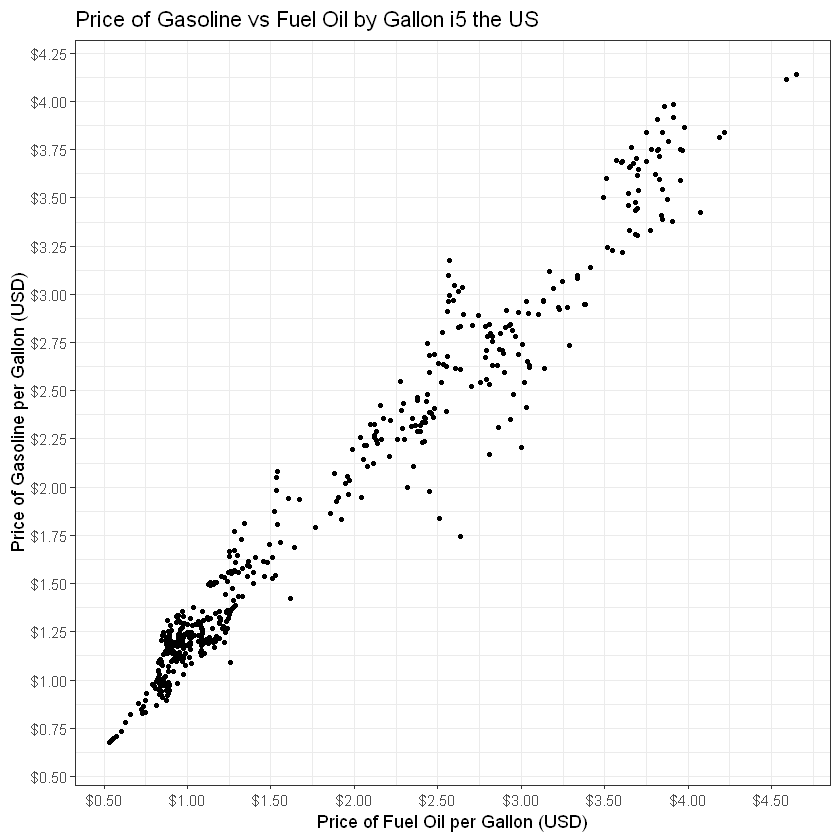

In [12]:
ggplot() + 
geom_point(data = main, aes(x= Fuel_Oil, y = Gasoline), size = 1, color = "black") + 
xlab("Price of Fuel Oil per Gallon (USD)") +
ylab("Price of Gasoline per Gallon (USD)") +
ggtitle("Price of Gasoline vs Fuel Oil by Gallon i5 the US") + 
scale_y_continuous(breaks = seq(from = 0, to = 5, by = 0.25), 
                   labels=scales::dollar_format(scale = 1.00)) + 

scale_x_continuous(breaks = seq(from = 0.0, to = 5, by = 0.50), 
                   labels=scales::dollar_format(scale = 1.00)) + 
theme_bw()


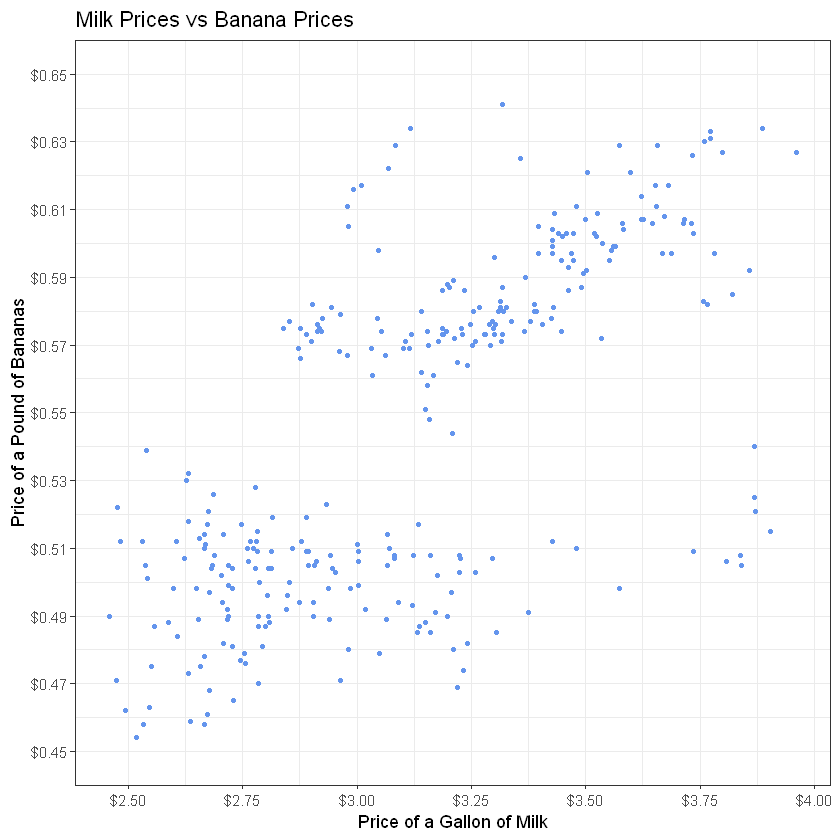

In [13]:
ggplot() + 
geom_point(data = main, aes(x= Milk, y = Bananas), size = 1, color = "cornflowerblue") + 
xlab("Price of a Gallon of Milk") +
ylab("Price of a Pound of Bananas") +
ggtitle("Milk Prices vs Banana Prices") + 
scale_y_continuous(limits = c(0.45,0.65), breaks = seq(from = 0.45, to = 0.65, by = 0.02), 
                   labels=scales::dollar_format(scale = 1.00)) + 

scale_x_continuous(breaks = seq(from = 2.0, to = 4.5, by = 0.25), 
                   labels=scales::dollar_format(scale = 1.00)) + 
theme_bw()

### Correlation Heatmap

In [14]:
# Generating a correlation matrix
cor(main[2:13], use="complete.obs")

,Bacon,Bananas,Bread,Chicken,Coffee,Eggs,Electricity,Flour,Fuel_Oil,Gasoline,Milk,Rice
Bacon,1.0000000,0.8260251,0.9084322,0.9519974,0.6583374,0.7336474,0.9310275,0.8980522,0.7382094,0.6924983,0.7373931,0.8387096
Bananas,0.8260251,1.0000000,0.9148024,0.8627365,0.8005826,0.7456875,0.8635092,0.9300645,0.8276252,0.7837720,0.7270999,0.8588776
Bread,0.9084322,0.9148024,1.0000000,0.9029520,0.7245826,0.7912954,0.9448391,0.9407728,0.8568070,0.8217485,0.8279597,0.8758671
Chicken,0.9519974,0.8627365,0.9029520,1.0000000,0.7468350,0.7202804,0.9051897,0.9058691,0.7149105,0.6591054,0.7098837,0.8693331
Coffee,0.6583374,0.8005826,0.7245826,0.7468350,1.0000000,0.6197757,0.7233515,0.8053248,0.7035496,0.6762233,0.5915766,0.7699536
Eggs,0.7336474,0.7456875,0.7912954,0.7202804,0.6197757,1.0000000,0.7639444,0.7900679,0.7334821,0.6963668,0.7162800,0.6505175
Electricity,0.9310275,0.8635092,0.9448391,0.9051897,0.7233515,0.7639444,1.0000000,0.9355033,0.8103835,0.7824656,0.7527008,0.8913502
Flour,0.8980522,0.9300645,0.9407728,0.9058691,0.8053248,0.7900679,0.9355033,1.0000000,0.8242778,0.7894960,0.7694539,0.8942373
Fuel_Oil,0.7382094,0.8276252,0.8568070,0.7149105,0.7035496,0.7334821,0.8103835,0.8242778,1.0000000,0.9790554,0.8530598,0.7368837
Gasoline,0.6924983,0.7837720,0.8217485,0.6591054,0.6762233,0.6963668,0.7824656,0.7894960,0.9790554,1.0000000,0.8401476,0.6843978


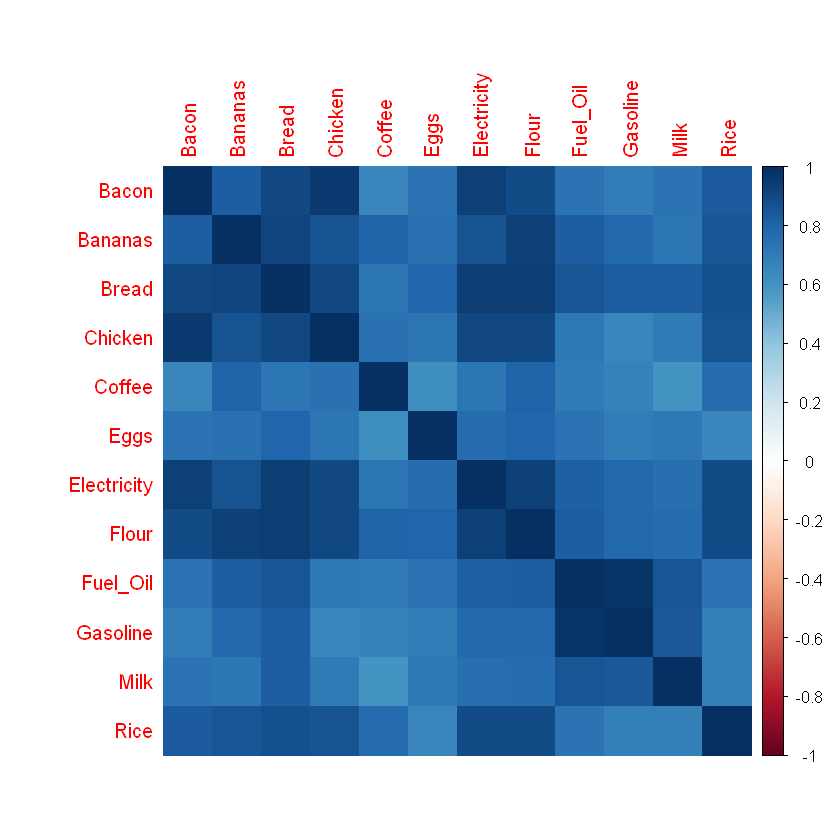

In [15]:
# Color map of correlation values
M <- cor(main[2:13], use="complete.obs")
corrplot(M, method = "color")

## 3. Organize a Data Report

Generate a summary report. Make sure to include: summary for every variable, structure and type of data elements, discuss four results of your data.

# The Consumer Price Index: A Summary Report
The Consumer Price Index (CPI) is a metric that monitors the buying power of the US dollar and shows the amount of inflation or deflation the current undergoes. The CPI is tracked by measuring the change of prices in common consumer goods and services. 

The Bureau of Labor Statistics reports the values of several consumer commodities like coffee, gasoline, electricity, and tomatoes. The data is available [here]( https://www.bls.gov/data/) 
First, we will download all the datasets that we want to investigate. I’ll be downloading the historical price data for the following items:
-	Bacon, sliced, per lb. (453.6 gm)
-	Bananas, per lb. (453.6 gm)
-	Bread, white, pan, per lb. (453.6 gm)
-	Chicken, fresh, whole, per lb. (453.6 gm)
-	Coffee, 100%, ground roast, all sizes, per lb. (453.6 gm) 
-	Eggs, grade A, large, per doz.
-	Electricity per KWH
-	Flour, white, all purpose, per lb. (453.6 gm)
-	Fuel oil #2 per gallon (3.785 liters)
-	Gasoline, all types, per gallon/3.785 liters
-	Milk, fresh, whole, fortified, per gal. (3.8 lit)
-	Oranges, Navel, per lb. (453.6 gm)
-	Rice, white, long grain, uncooked, per lb. (453.6 gm)
-	Tomatoes, field grown, per lb. (453.6 gm)

Since the production of these commodities is relatively stable and consumption remains stable during recessions, these commodities were selected to represent the purchasing power of the US dollar. 
We can see that all these commodities are highly correlated with one another because of this fact. 


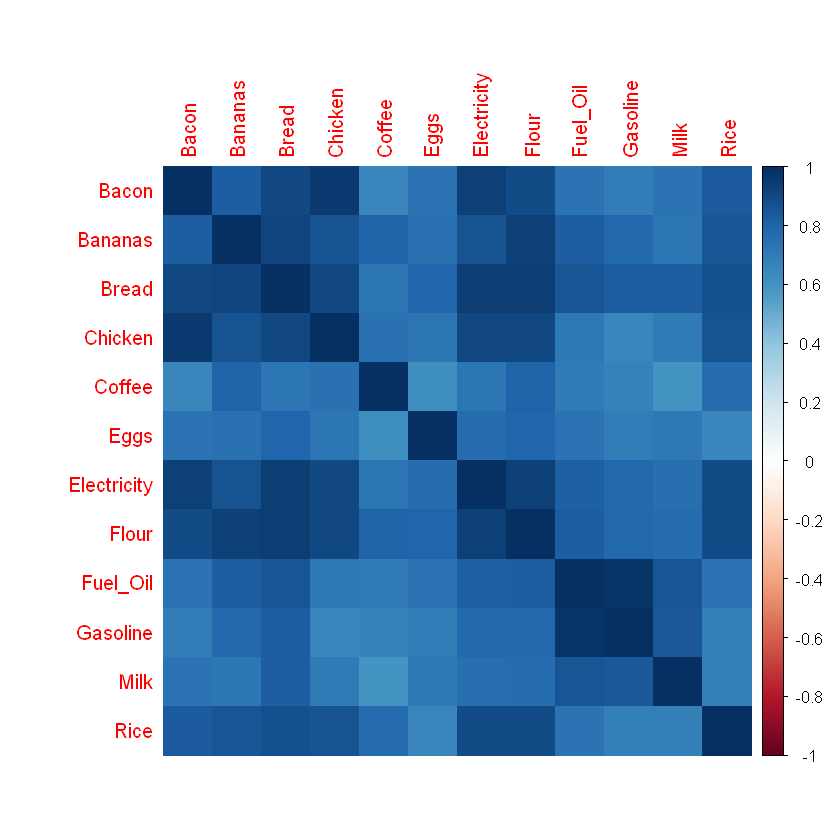

In [23]:
corrplot(M, method = "color")

These high correlation values are all a result of a connection with the US dollar. As the buying power of the dollar decreases, the prices of all commodities increase. We can easily see upward trends in every commoditiy

`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'


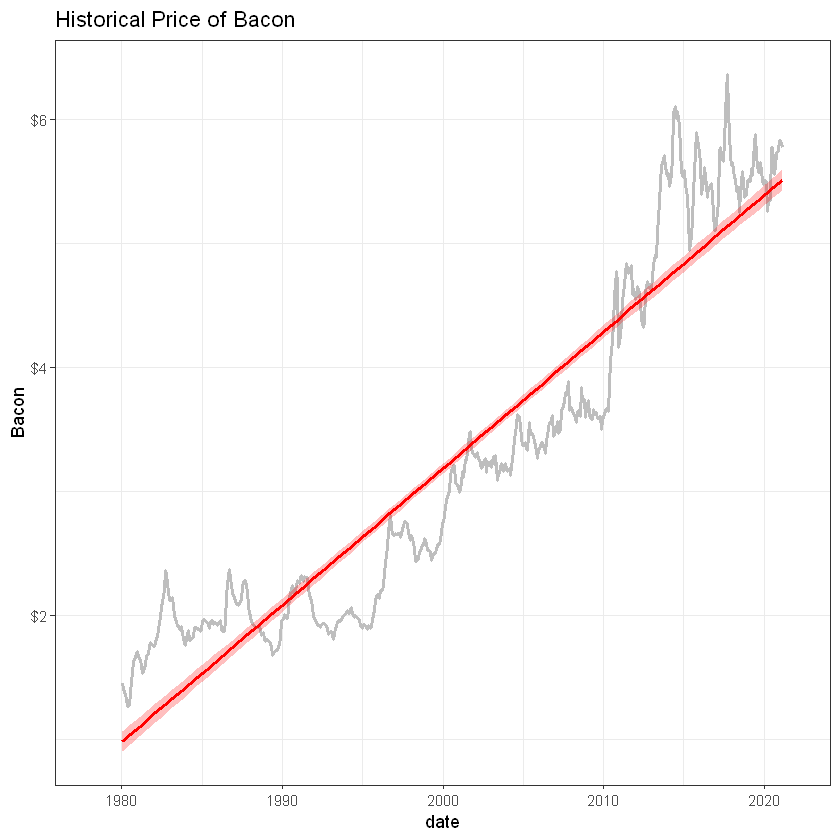

`geom_smooth()` using formula 'y ~ x'


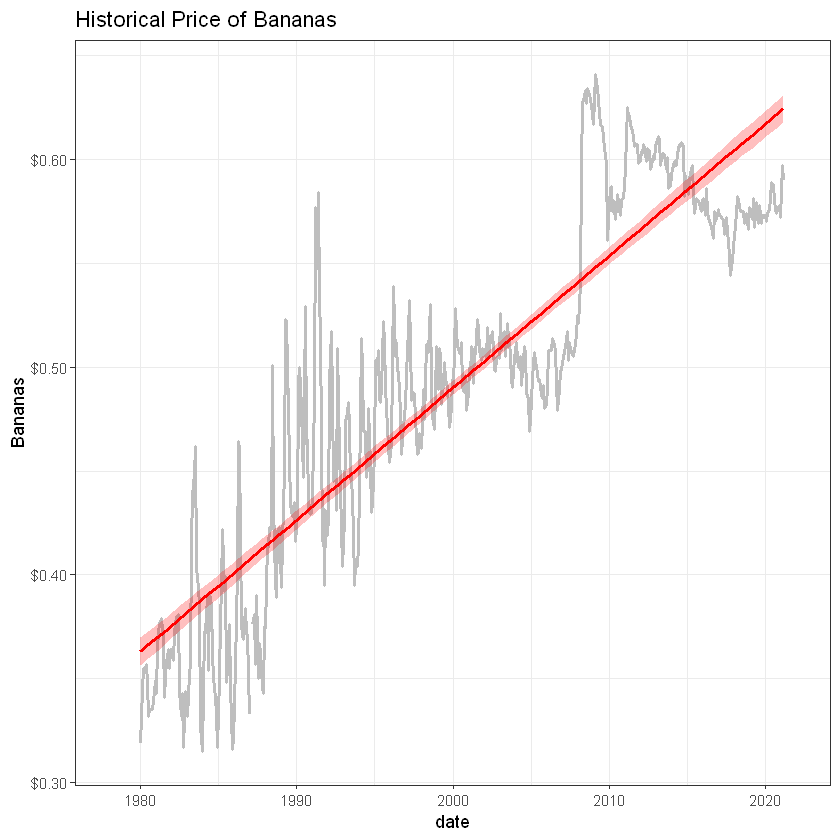

`geom_smooth()` using formula 'y ~ x'


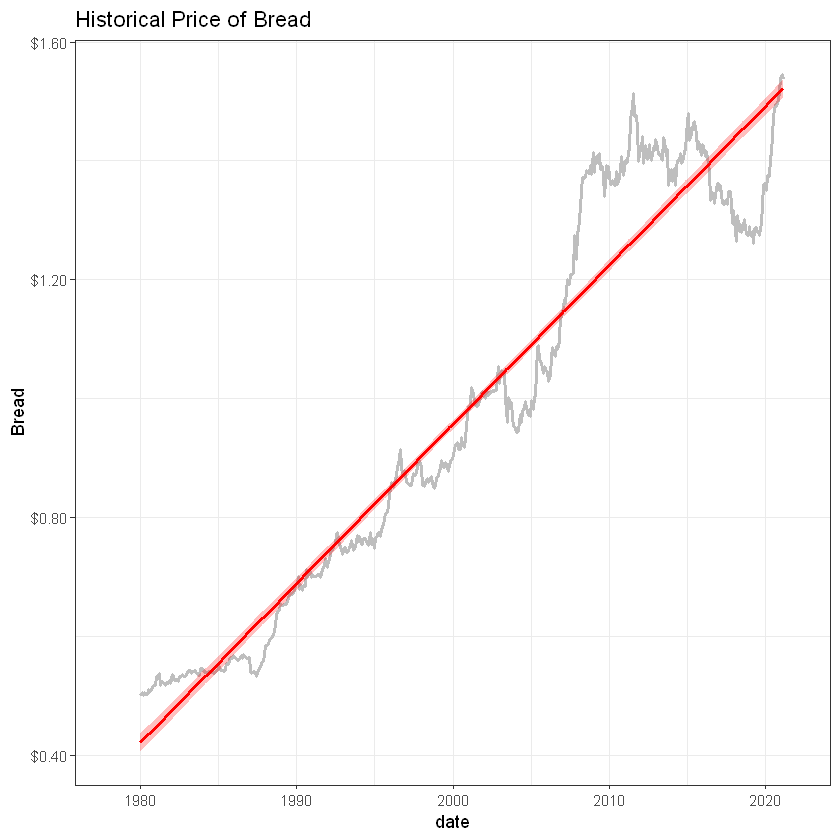

`geom_smooth()` using formula 'y ~ x'


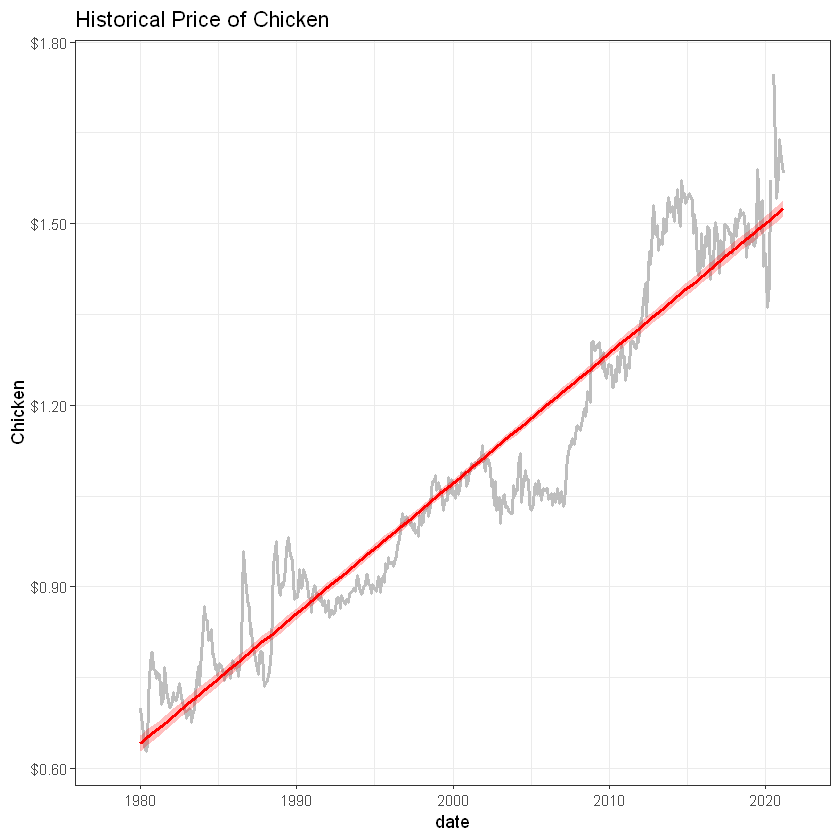

`geom_smooth()` using formula 'y ~ x'


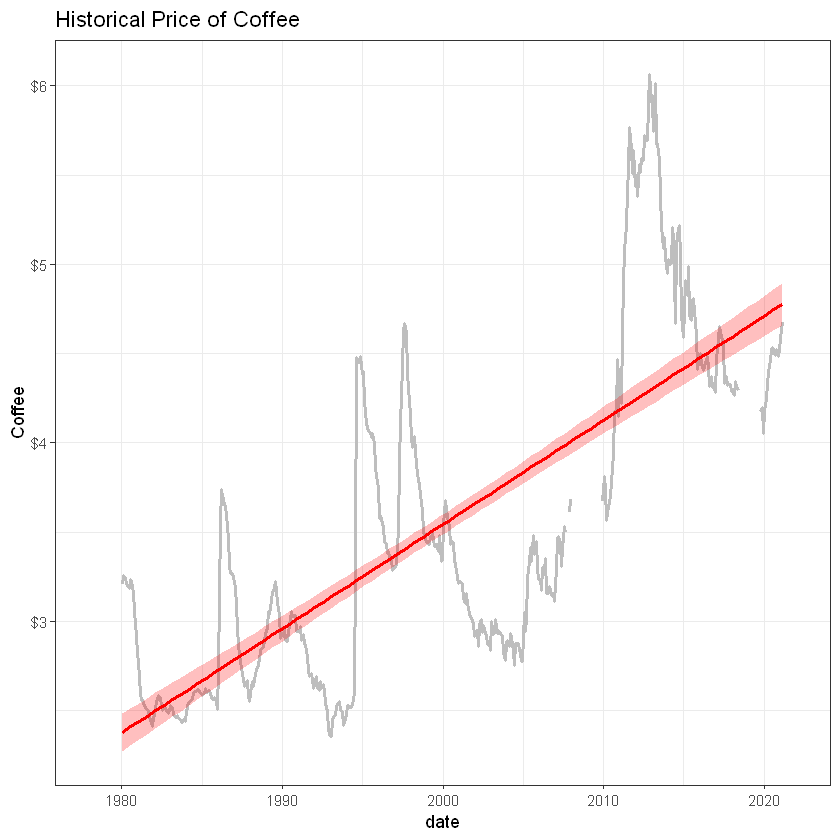

`geom_smooth()` using formula 'y ~ x'


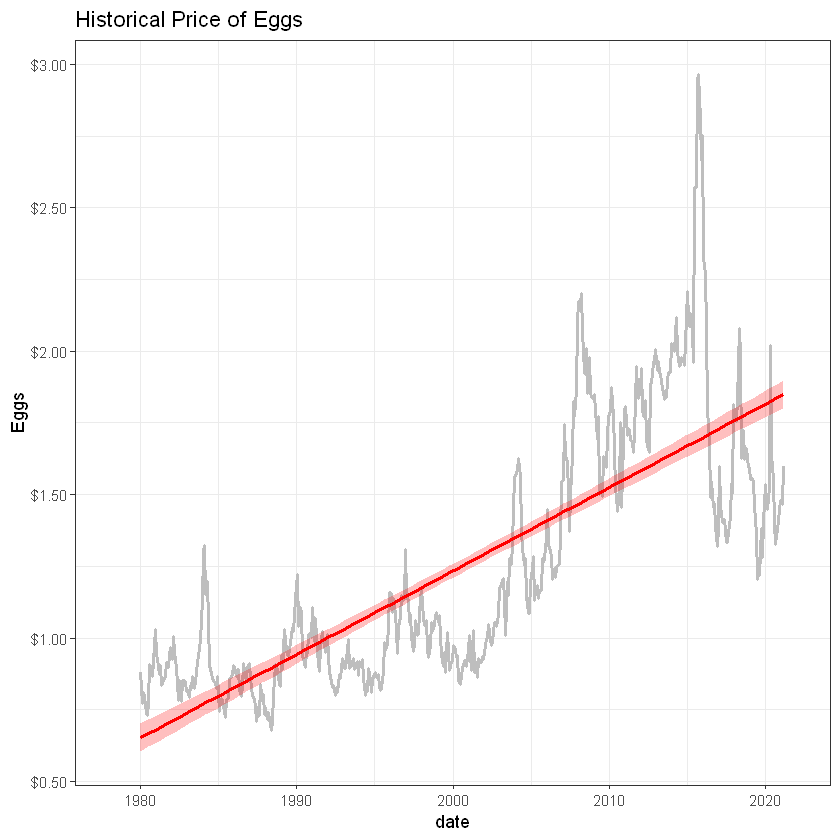

`geom_smooth()` using formula 'y ~ x'


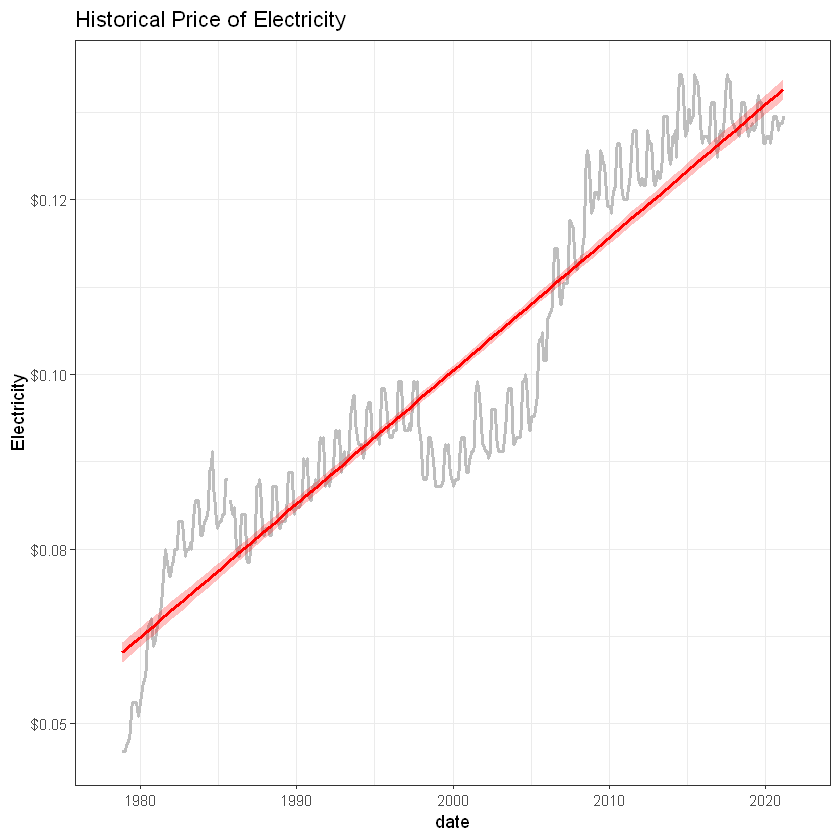

`geom_smooth()` using formula 'y ~ x'


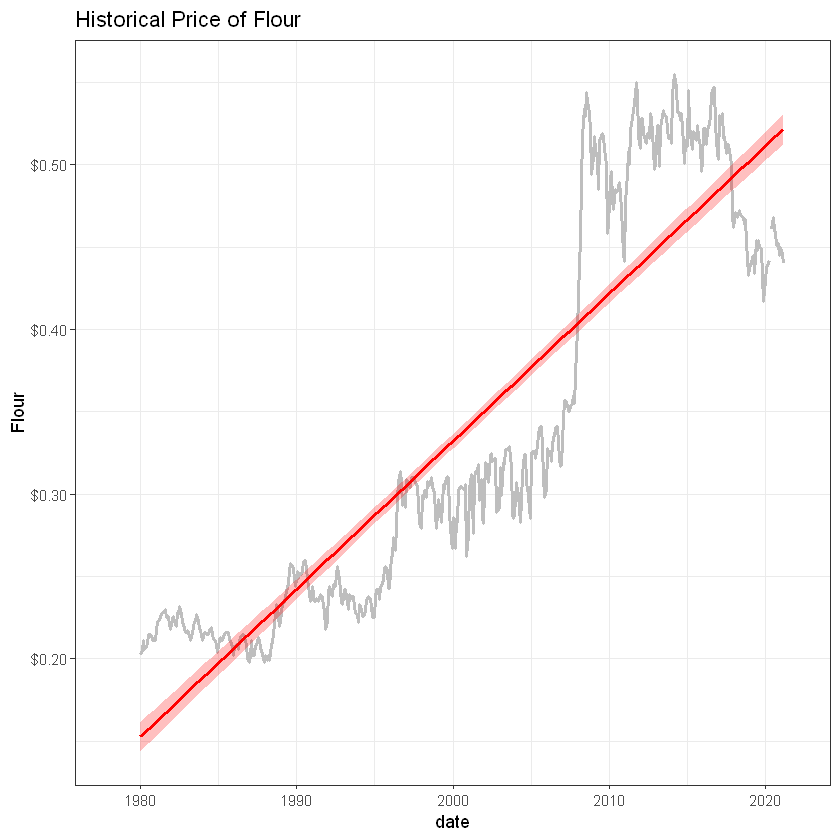

`geom_smooth()` using formula 'y ~ x'


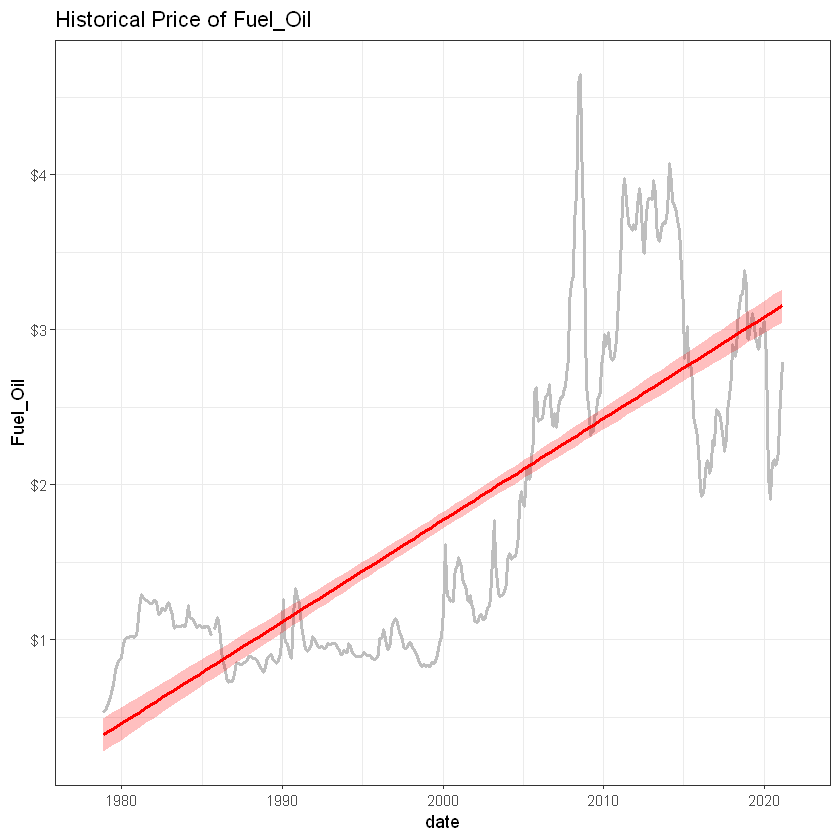

`geom_smooth()` using formula 'y ~ x'


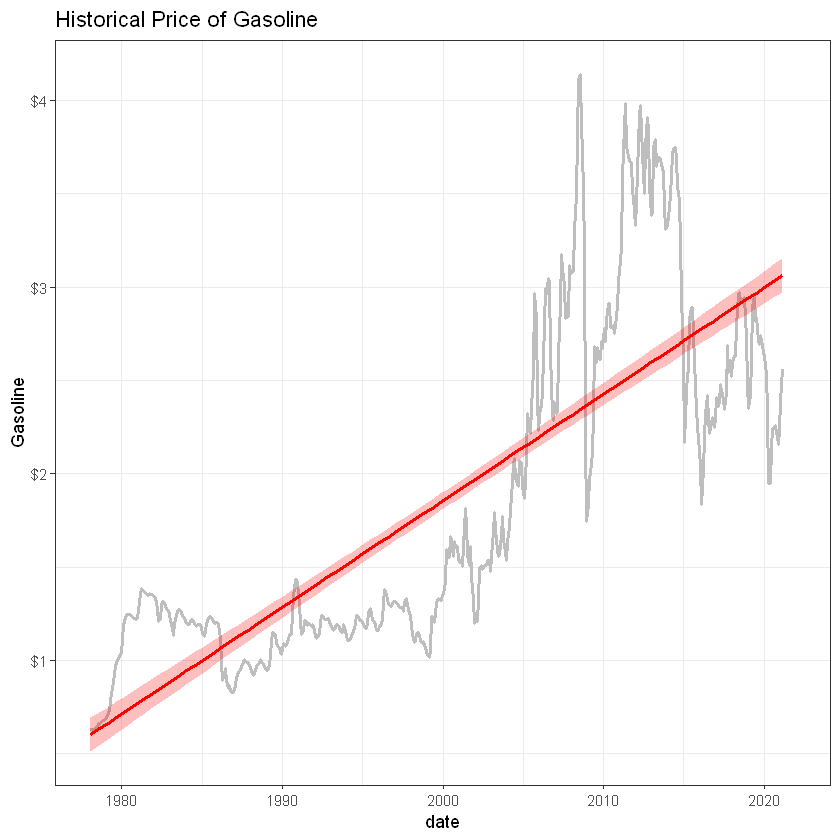

`geom_smooth()` using formula 'y ~ x'


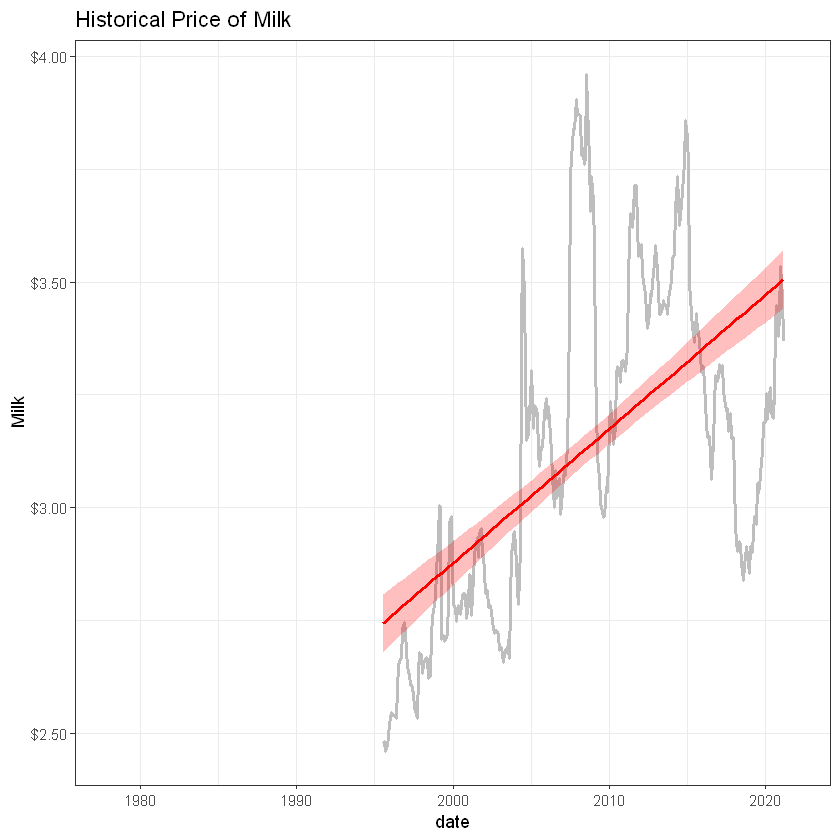

`geom_smooth()` using formula 'y ~ x'


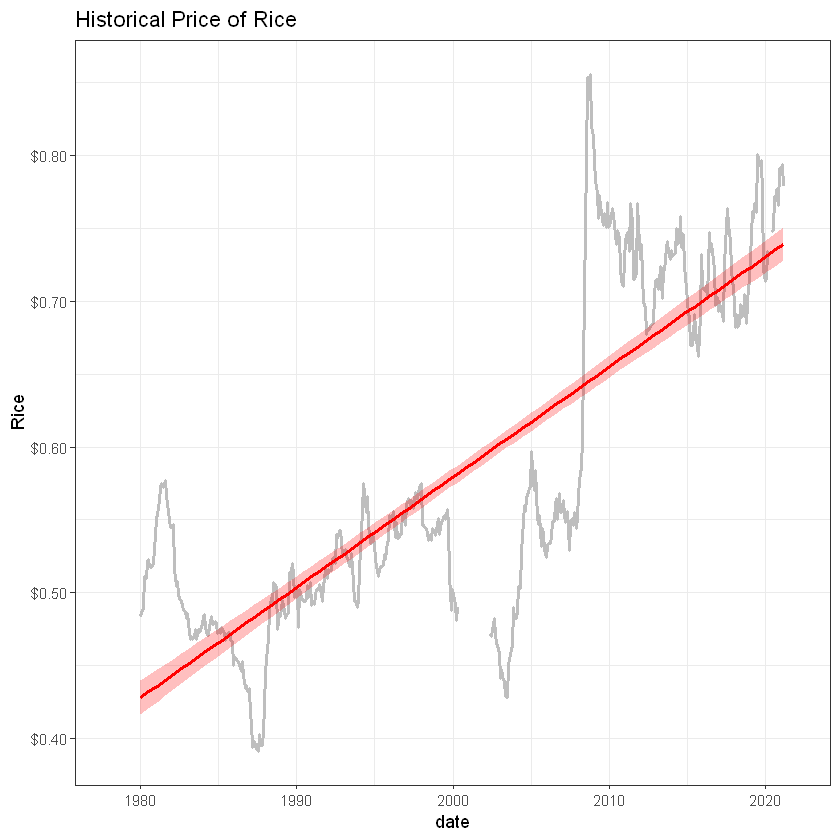

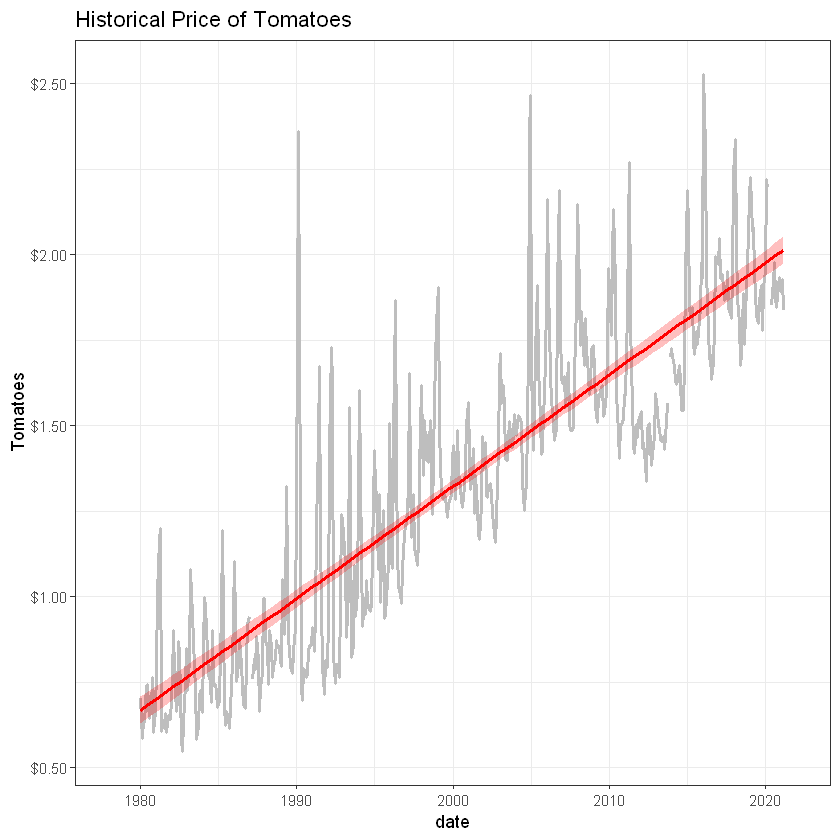

In [17]:
for(i in commodities){
  plt <- ggplot(main, aes_string(x="date", y = i)) +
    geom_line(color = "gray", size = 1) + 
    geom_smooth(method=lm, alpha=0.25, color="red", fill="red") +
    scale_y_continuous(labels=scales::dollar_format(scale = 1.00)) + 
    theme_bw() + 
    ggtitle(paste("Historical Price of",i, sep = " ")) 
  print(plt)
}

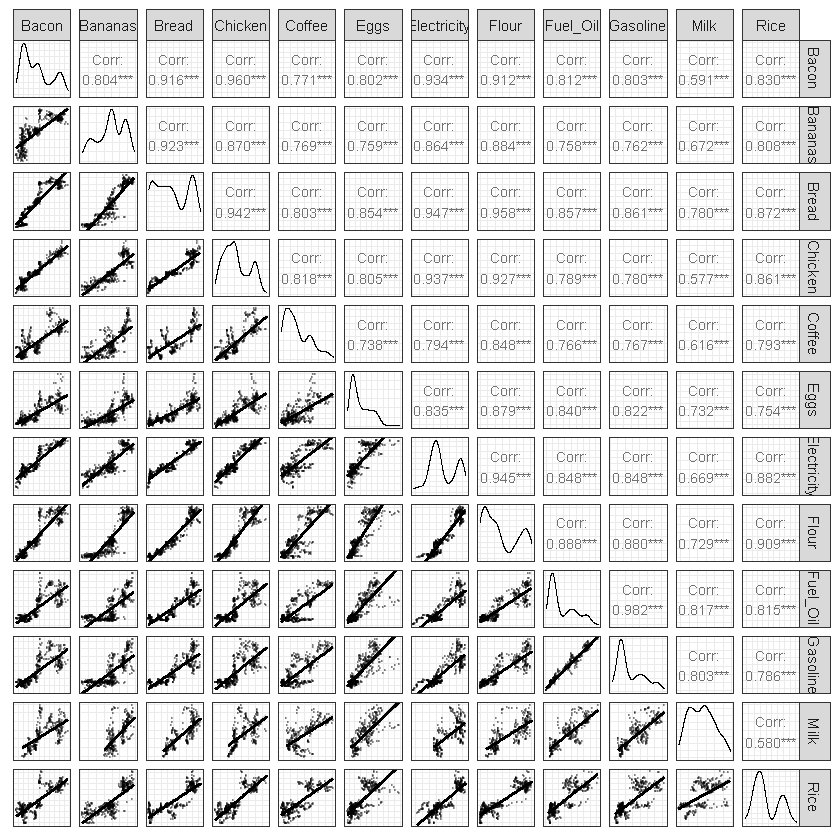

In [42]:
ggpairs(main[2:13], lower = list(continuous = wrap("smooth", alpha = 0.3, size=0.1)), 
                    upper = list(continuous = wrap("cor", size=3))
       ) + 
theme_bw() + 
theme(axis.line=element_blank(),
        axis.text=element_blank(),
        axis.ticks=element_blank())